In [264]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

#### Подключение к базе данных

In [265]:
try:
    conn = sqlite3.connect('../data/checking-logs.sqlite')
    print("Успешное подключение к базе данных.")
except sqlite3.Error as e:
    print(f"Ошибка при подключении к базе данных: {e}")
    exit()

Успешное подключение к базе данных.


#### Даты, когда были и просмотры, и коммиты checker

In [266]:
query_commits = "SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'"
commits = pd.read_sql_query(query_commits, conn, parse_dates=['timestamp'])
commits['weekday'] = commits['timestamp'].dt.day_name()
commits['hour'] = commits['timestamp'].dt.hour
commits

,uid,timestamp,weekday,hour
0,user_4,2020-04-17 05:19:02.744528,Friday,5
1,user_4,2020-04-17 05:22:35.249331,Friday,5
2,user_4,2020-04-17 05:22:45.549397,Friday,5
3,user_4,2020-04-17 05:34:14.691200,Friday,5
4,user_4,2020-04-17 05:34:24.422370,Friday,5
...,...,...,...,...
3202,user_1,2020-05-21 20:19:06.872761,Thursday,20
3203,user_1,2020-05-21 20:22:41.785725,Thursday,20
3204,user_1,2020-05-21 20:22:41.877806,Thursday,20
3205,user_1,2020-05-21 20:37:00.129678,Thursday,20


### Фрейм коммитов пользователей по дням недели

In [267]:
columns = commits.groupby('uid').count().sort_values('hour', ascending=False).index

In [268]:
df1 = commits.groupby('uid').weekday.value_counts().unstack(0)
df1 = df1.fillna(0)
df1 = df1.reindex(columns=columns)
df1 = df1.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
df1

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Monday,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,0.0,2.0,0.0,3.0
Tuesday,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0
Wednesday,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,0.0,3.0,0.0,0.0,0.0
Thursday,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,0.0,2.0,6.0,0.0
Friday,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Saturday,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sunday,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,8.0,0.0,1.0,0.0,0.0


### Фрейм коммитов пользователей по часам

In [269]:
index = pd.RangeIndex(stop=24)

In [270]:
df2 = commits.groupby('uid').hour.value_counts().unstack(0)
df2 = df2.fillna(0)
df2 = df2.reindex(columns=columns)
df2 = df2.reindex(index=index, fill_value=0)
df2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_11,user_7,user_22,user_23,user_0
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9,0.0,4.0,13.0,0.0,0.0,3.0,0.0,1.0,0.0,3.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0


### Построение графиков heatmap

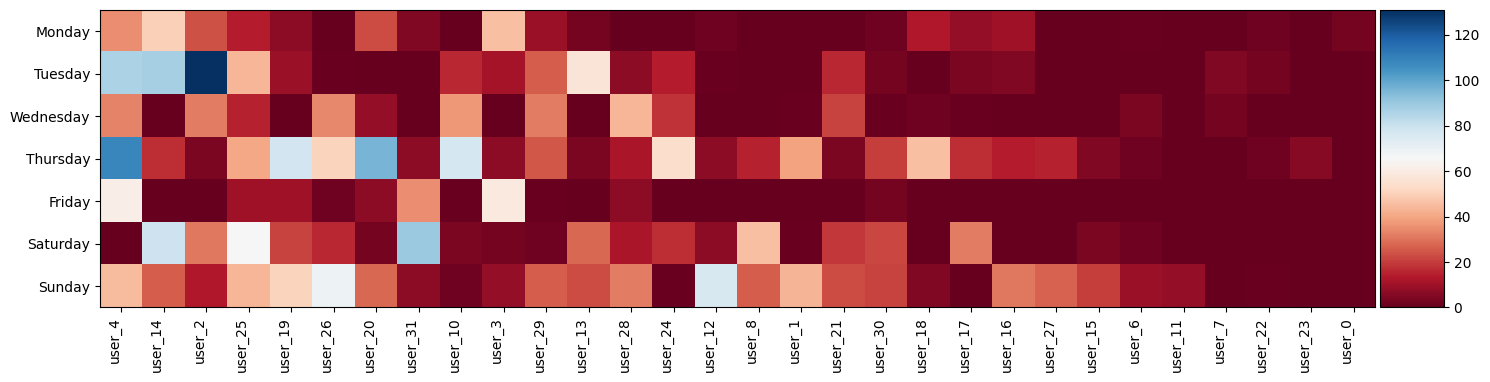

In [271]:
data_array = df1.values
fig, ax = plt.subplots(figsize=(15, 8))

im = ax.imshow(data_array, cmap='RdBu')

# Создаем цветовой бар (colorbar)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('', rotation=-90, va="bottom")

# Настройка меток осей
ax.set_xticks(range(len(df1.columns)))
ax.set_yticks(range(len(df1.index)))

# Используем названия столбцов и индексов DataFrame для меток
ax.set_xticklabels(df1.columns, rotation=90, ha="right")
ax.set_yticklabels(df1.index)

fig.tight_layout()
plt.show()

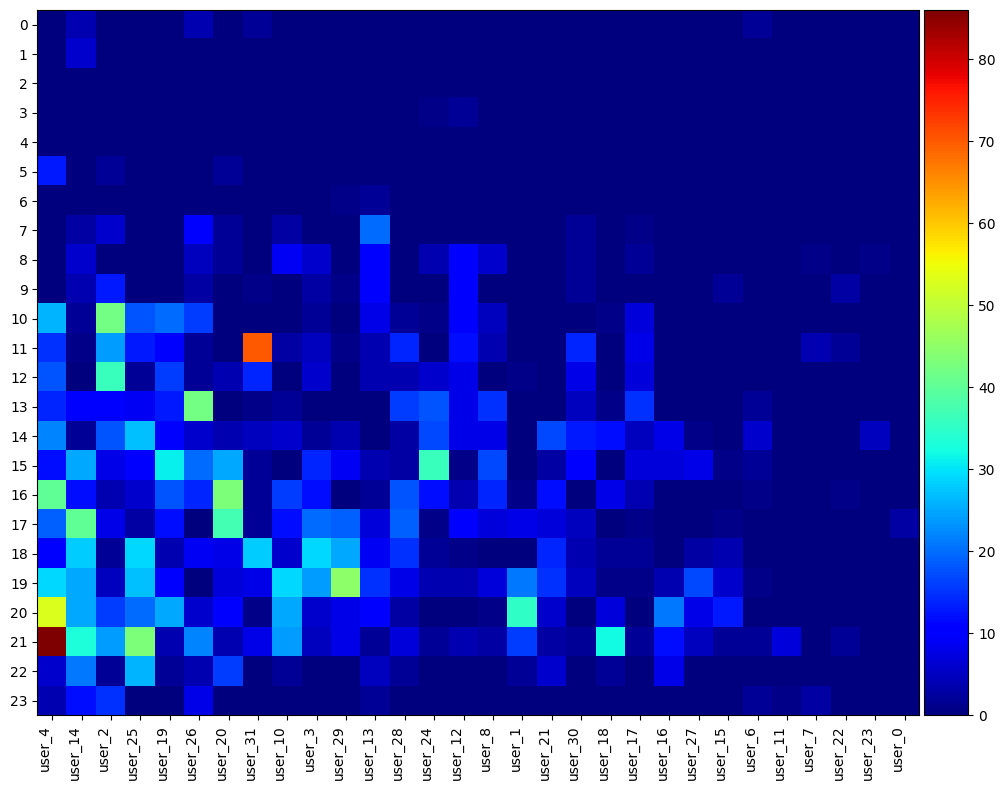

In [272]:
data_array = df2.values
fig, ax = plt.subplots(figsize=(15, 8))

im = ax.imshow(data_array, cmap='jet')

# Создаем цветовой бар (colorbar)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
cbar = fig.colorbar(im, cax=cax)
cbar.ax.set_ylabel('', rotation=-90, va="bottom")

# Настройка меток осей
ax.set_xticks(range(len(df2.columns)))
ax.set_yticks(range(len(df2.index)))

# Используем названия столбцов и индексов DataFrame для меток
ax.set_xticklabels(df2.columns, rotation=90, ha="right")
ax.set_yticklabels(df2.index)

fig.tight_layout()
plt.show()

### У какого пользователя больше всего коммитов во вт?
* Ответ: user_2

### Какой пользователь имеет больше всего коммитов в Чт?
* Ответ: user_4

### В какой будний день пользователи не любят делать много коммитов?
* Ответ: Fridey

### Какой пользователь в какой час сделал наибольшее количество коммитов?
* Ответ: user_4, 21